# SAL384 Final Project
by Santino Primerano & Peyton Smith

In [2]:
#Allow output from every line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [3]:
#Step 1 Data Collection Using Web Scraping
url = 'https://www.naturalstattrick.com/teamtable.php?fromseason=20182019&thruseason=20182019&stype=2&sit=all&score=all&rate=n&team=all&loc=B&gpf=410&fd=&td='
html = urlopen(url)
bs = BeautifulSoup(html.read(), 'lxml')
tables = bs.find_all('table', {'class':'display'})
len(tables)
stats_tables = pd.read_html(str(tables))
stats_tables[0]

1

,Unnamed: 0,Team,GP,TOI,W,L,OTL,ROW,Points,Point %,...,LDSA,LDSF%,LDGF,LDGA,LDGF%,LDSH%,LDSV%,SH%,SV%,PDO
0,1,Anaheim Ducks,82,4972.0000,35,37,10,32,80,0.488,...,1014,47.65,33,30,52.38,3.58,97.04,8.63,90.91,0.995
1,2,Arizona Coyotes,82,4980.3500,39,35,8,35,86,0.524,...,1083,49.70,39,36,52.00,3.64,96.68,8.29,91.29,0.996
2,3,Boston Bruins,82,4983.5167,49,24,9,47,107,0.652,...,953,54.94,44,42,51.16,3.79,95.59,9.59,91.23,1.008
3,4,Buffalo Sabres,82,4994.3500,33,39,10,28,76,0.463,...,1174,51.27,36,34,51.43,2.91,97.10,8.19,90.09,0.983
4,5,Carolina Hurricanes,82,4957.9167,46,29,7,44,99,0.604,...,964,55.49,39,26,60.00,3.24,97.30,8.61,90.57,0.992
5,6,Columbus Blue Jackets,82,4953.4167,47,31,4,45,98,0.598,...,962,51.07,37,36,50.68,3.69,96.26,9.88,90.45,1.003
6,7,Calgary Flames,82,4950.9167,50,25,7,50,107,0.652,...,867,54.68,44,43,50.57,4.21,95.04,10.88,90.31,1.012
7,8,Chicago Blackhawks,82,4979.3167,36,34,12,33,84,0.512,...,1119,50.57,45,52,46.39,3.93,95.35,10.00,89.80,0.998
8,9,Colorado Avalanche,82,4972.7000,38,30,14,36,90,0.549,...,1131,49.46,48,47,50.53,4.34,95.84,9.64,90.68,1.003
9,10,Dallas Stars,82,4962.5667,43,32,7,42,93,0.567,...,1105,47.88,43,40,51.81,4.24,96.38,8.29,92.28,1.006


In [4]:
#Create Function to Scrape Data From Natural Stat Trick
def scrape_season(season):
    url = 'https://www.naturalstattrick.com/teamtable.php?fromseason=' + str(season) + '&thruseason=' + str(season) + '&stype=2&sit=all&score=all&rate=n&team=all&loc=B&gpf=410&fd=&td='
    print(url)
    html = urlopen(url)
    bs = BeautifulSoup(html.read(), 'lxml')
    tables = bs.find_all('table', {'class':'display'})
    stats_tables = pd.read_html(str(tables))
    
    team_stats = pd.DataFrame(stats_tables[0])
    return(team_stats)

team_stats_19 = scrape_season(20182019)
team_stats_18 = scrape_season(20172018)
team_stats_17 = scrape_season(20162017)
team_stats_16 = scrape_season(20152016)
team_stats_15 = scrape_season(20142015)
team_stats_14 = scrape_season(20132014)

https://www.naturalstattrick.com/teamtable.php?fromseason=20182019&thruseason=20182019&stype=2&sit=all&score=all&rate=n&team=all&loc=B&gpf=410&fd=&td=
https://www.naturalstattrick.com/teamtable.php?fromseason=20172018&thruseason=20172018&stype=2&sit=all&score=all&rate=n&team=all&loc=B&gpf=410&fd=&td=
https://www.naturalstattrick.com/teamtable.php?fromseason=20162017&thruseason=20162017&stype=2&sit=all&score=all&rate=n&team=all&loc=B&gpf=410&fd=&td=
https://www.naturalstattrick.com/teamtable.php?fromseason=20152016&thruseason=20152016&stype=2&sit=all&score=all&rate=n&team=all&loc=B&gpf=410&fd=&td=
https://www.naturalstattrick.com/teamtable.php?fromseason=20142015&thruseason=20142015&stype=2&sit=all&score=all&rate=n&team=all&loc=B&gpf=410&fd=&td=
https://www.naturalstattrick.com/teamtable.php?fromseason=20132014&thruseason=20132014&stype=2&sit=all&score=all&rate=n&team=all&loc=B&gpf=410&fd=&td=


In [5]:
#Add Season Column to each table
team_stats_19['Season'] = 2019
team_stats_18['Season'] = 2018
team_stats_17['Season'] = 2017
team_stats_16['Season'] = 2016
team_stats_15['Season'] = 2015
team_stats_14['Season'] = 2014

#Concatenate into one table
team_stats_all =  pd.concat([team_stats_19, team_stats_18, team_stats_17, team_stats_16, team_stats_15, team_stats_14])
team_stats_all

,Unnamed: 0,Team,GP,TOI,W,L,OTL,ROW,Points,Point %,...,LDSF%,LDGF,LDGA,LDGF%,LDSH%,LDSV%,SH%,SV%,PDO,Season
0,1,Anaheim Ducks,82,4972.0000,35,37,10,32,80,0.488,...,47.65,33,30,52.38,3.58,97.04,8.63,90.91,0.995,2019
1,2,Arizona Coyotes,82,4980.3500,39,35,8,35,86,0.524,...,49.70,39,36,52.00,3.64,96.68,8.29,91.29,0.996,2019
2,3,Boston Bruins,82,4983.5167,49,24,9,47,107,0.652,...,54.94,44,42,51.16,3.79,95.59,9.59,91.23,1.008,2019
3,4,Buffalo Sabres,82,4994.3500,33,39,10,28,76,0.463,...,51.27,36,34,51.43,2.91,97.10,8.19,90.09,0.983,2019
4,5,Carolina Hurricanes,82,4957.9167,46,29,7,44,99,0.604,...,55.49,39,26,60.00,3.24,97.30,8.61,90.57,0.992,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,26,Tampa Bay Lightning,82,5013.1167,46,27,9,38,101,0.616,...,51.09,39,28,58.21,3.68,97.24,9.48,91.29,1.008,2014
26,27,Toronto Maple Leafs,82,5007.2500,38,36,8,29,84,0.512,...,42.30,39,44,46.99,3.74,96.91,9.69,91.44,1.011,2014
27,28,Vancouver Canucks,82,5007.8500,36,35,11,31,83,0.506,...,53.88,43,32,57.33,3.58,96.89,7.56,90.72,0.983,2014
28,29,Winnipeg Jets,82,5013.0500,37,35,10,29,84,0.512,...,51.23,38,46,45.24,3.31,95.79,8.70,90.66,0.994,2014


In [6]:
#Sort team_stats_all by team and season
team_stats_all = team_stats_all.sort_values(by = ['Season','Team'])

#Add Column for Goal Differential and Expected Goal Differential
team_stats_all['GD'] = team_stats_all['GF'] - team_stats_all['GA']
team_stats_all['xGD'] = team_stats_all['xGF'] - team_stats_all['xGA']
team_stats_all

,Unnamed: 0,Team,GP,TOI,W,L,OTL,ROW,Points,Point %,...,LDGA,LDGF%,LDSH%,LDSV%,SH%,SV%,PDO,Season,GD,xGD
0,1,Anaheim Ducks,82,4990.8833,54,20,8,51,116,0.707,...,22,64.52,3.81,97.75,10.24,91.38,1.016,2014,60,16.78
1,2,Boston Bruins,82,4978.8167,54,19,9,51,117,0.713,...,35,58.82,4.11,96.78,9.87,92.83,1.027,2014,87,23.40
2,3,Buffalo Sabres,82,4994.5167,21,51,10,14,52,0.317,...,46,33.33,2.23,96.37,6.95,91.37,0.983,2014,-93,-65.62
5,6,Calgary Flames,82,4995.0500,35,40,7,28,77,0.470,...,44,45.68,3.69,95.69,9.19,89.86,0.990,2014,-36,-18.98
3,4,Carolina Hurricanes,82,4979.1500,36,35,11,34,83,0.506,...,35,57.32,3.87,96.96,8.00,91.09,0.991,2014,-21,-3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,27,Toronto Maple Leafs,82,4959.9833,46,28,8,46,100,0.610,...,35,56.79,4.63,96.97,10.45,90.84,1.013,2019,37,28.59
27,28,Vancouver Canucks,82,5009.9333,35,36,11,29,81,0.494,...,44,46.99,3.74,95.78,9.00,90.45,0.995,2019,-29,-22.05
28,29,Vegas Golden Knights,82,4959.5167,43,32,7,40,93,0.567,...,37,56.98,4.35,96.14,8.74,90.50,0.992,2019,18,47.74
30,31,Washington Capitals,82,4977.8333,48,26,8,44,104,0.634,...,37,61.86,5.66,96.47,10.99,90.41,1.014,2019,26,-12.23


In [7]:
#Rename variables to get rid of % symbols
team_stats_all = team_stats_all.rename(columns={'Point %':'Point_Pct','CF%':'CF_Pct','FF%':'FF_Pct','SF%':'SF_Pct',
                                                'GF%':'GF_Pct','xGF%':'xGF_Pct','SCF%':'SCF_Pct','SCGF%':'SCGF_Pct',
                                                'SCSH%':'SCSH_Pct','SCSF%':'SCSF_Pct','SCSV%':'SCSV_Pct',
                                                'HDCF%':'HDCF_Pct','HDSF%':'HDSF_Pct','HDGF%':'HDGF_Pct',
                                                'HDSH%':'HDSH_Pct','HDSV%':'HDSV_Pct','MDCF%':'MDCF_Pct',
                                                'MDSF%':'MDSF_Pct','MDGF%':'MDGF_Pct','MDSH%':'MDSH_Pct',
                                                'MDSV%':'MDSV_Pct','LDCF%':'LDCF_Pct','LDSF%':'LDSF_Pct',
                                                'LDGF%':'LDGF_Pct','LDSH%':'LDSH_Pct','LDSV%':'LDSV_Pct',
                                                'SH%':'SH_Pct','SV%':'SV_Pct'})
team_stats_all

,Unnamed: 0,Team,GP,TOI,W,L,OTL,ROW,Points,Point_Pct,...,LDGA,LDGF_Pct,LDSH_Pct,LDSV_Pct,SH_Pct,SV_Pct,PDO,Season,GD,xGD
0,1,Anaheim Ducks,82,4990.8833,54,20,8,51,116,0.707,...,22,64.52,3.81,97.75,10.24,91.38,1.016,2014,60,16.78
1,2,Boston Bruins,82,4978.8167,54,19,9,51,117,0.713,...,35,58.82,4.11,96.78,9.87,92.83,1.027,2014,87,23.40
2,3,Buffalo Sabres,82,4994.5167,21,51,10,14,52,0.317,...,46,33.33,2.23,96.37,6.95,91.37,0.983,2014,-93,-65.62
5,6,Calgary Flames,82,4995.0500,35,40,7,28,77,0.470,...,44,45.68,3.69,95.69,9.19,89.86,0.990,2014,-36,-18.98
3,4,Carolina Hurricanes,82,4979.1500,36,35,11,34,83,0.506,...,35,57.32,3.87,96.96,8.00,91.09,0.991,2014,-21,-3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,27,Toronto Maple Leafs,82,4959.9833,46,28,8,46,100,0.610,...,35,56.79,4.63,96.97,10.45,90.84,1.013,2019,37,28.59
27,28,Vancouver Canucks,82,5009.9333,35,36,11,29,81,0.494,...,44,46.99,3.74,95.78,9.00,90.45,0.995,2019,-29,-22.05
28,29,Vegas Golden Knights,82,4959.5167,43,32,7,40,93,0.567,...,37,56.98,4.35,96.14,8.74,90.50,0.992,2019,18,47.74
30,31,Washington Capitals,82,4977.8333,48,26,8,44,104,0.634,...,37,61.86,5.66,96.47,10.99,90.41,1.014,2019,26,-12.23


In [8]:
#Read in the dummy variables for playoffs
playoff_data = pd.read_csv('Data/Final_Project_Playoff_Dummies.csv') 
playoff_data

,Team,Season,Win_Series,Home_Ice,Road_Ice,Division_Leader,Non_Division_Leader
0,Anaheim Ducks,2018,0,1,0,0,1
1,Anaheim Ducks,2017,1,1,0,1,0
2,Anaheim Ducks,2016,0,1,0,1,0
3,Anaheim Ducks,2015,1,1,0,1,0
4,Anaheim Ducks,2014,1,1,0,1,0
...,...,...,...,...,...,...,...
91,Washington Capitals,2016,1,1,0,1,0
92,Washington Capitals,2015,1,1,0,0,1
93,Winnipeg Jets,2019,0,1,0,0,1
94,Winnipeg Jets,2018,1,1,0,0,1


In [9]:
#Merge the season stats and playoff dummies
merged_data = pd.merge(team_stats_all, playoff_data, on=['Team','Season'])
merged_data
merged_data.to_csv('Data/Final_Project_Data_Merged.csv')

,Unnamed: 0,Team,GP,TOI,W,L,OTL,ROW,Points,Point_Pct,...,SV_Pct,PDO,Season,GD,xGD,Win_Series,Home_Ice,Road_Ice,Division_Leader,Non_Division_Leader
0,1,Anaheim Ducks,82,4990.8833,54,20,8,51,116,0.707,...,91.38,1.016,2014,60,16.78,1,1,0,1,0
1,2,Boston Bruins,82,4978.8167,54,19,9,51,117,0.713,...,92.83,1.027,2014,87,23.40,1,1,0,1,0
2,7,Chicago Blackhawks,82,5007.4500,46,21,15,40,107,0.652,...,90.49,1.001,2014,49,28.93,1,0,1,0,1
3,8,Colorado Avalanche,82,5002.9667,52,22,8,47,112,0.683,...,91.93,1.021,2014,29,-23.88,0,1,0,1,0
4,5,Columbus Blue Jackets,82,4976.7500,43,32,7,38,93,0.567,...,91.52,1.008,2014,11,5.67,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,26,Tampa Bay Lightning,82,4979.5667,62,16,4,56,128,0.780,...,91.61,1.038,2019,98,19.77,0,1,0,1,0
92,27,Toronto Maple Leafs,82,4959.9833,46,28,8,46,100,0.610,...,90.84,1.013,2019,37,28.59,0,0,1,0,1
93,29,Vegas Golden Knights,82,4959.5167,43,32,7,40,93,0.567,...,90.50,0.992,2019,18,47.74,0,0,1,0,1
94,31,Washington Capitals,82,4977.8333,48,26,8,44,104,0.634,...,90.41,1.014,2019,26,-12.23,0,1,0,1,0


In [10]:
playoff_data['Team']

0           Anaheim Ducks
1           Anaheim Ducks
2           Anaheim Ducks
3           Anaheim Ducks
4           Anaheim Ducks
             ...         
91    Washington Capitals
92    Washington Capitals
93          Winnipeg Jets
94          Winnipeg Jets
95          Winnipeg Jets
Name: Team, Length: 96, dtype: object

In [11]:
#Our Logit Regression Set Up & Results:
nhl_2014_2019 = pd.read_csv('Data/Final_Project_Data_Merged.csv')
win_playoff_series_formula = \
    'Win_Series ~ Division_Leader + Home_Ice + CF + CA + HDCF + HDCA + HDCF + HDCA + HDGF + HDGA + xGF + xGA'

win_playoff_series_logit_model = smf.logit(formula = str(win_playoff_series_formula), data = nhl_2014_2019).fit()
win_playoff_series_logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.613337
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Win_Series   No. Observations:                   96
Model:                          Logit   Df Residuals:                       85
Method:                           MLE   Df Model:                           10
Date:                Sun, 26 Apr 2020   Pseudo R-squ.:                  0.1151
Time:                        23:17:33   Log-Likelihood:                -58.880
converged:                       True   LL-Null:                       -66.542
Covariance Type:            nonrobust   LLR p-value:                    0.1207
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.3433      6.400      0.991      0.322      -6.201      18.887
Division_Leader    -0.3009      0.677     -0.444      0.657      -1.629       1.027
Home_Ice            0.9778      0.577      1.694      0.090      -0.153       2.109
CF                 -0.0002      0.001     -0.109      0.913      -0.003       0.003
CA                  0.0014      0.001      1.022      0.307      -0.001       0.004
HDCF                0.0052      0.006      0.884      0.377      -0.006       0.017
HDCA                0.0146      0.007      2.051      0.040       0.001       0.029
HDGF               -0.0120      0.019     -0.617      0.537      -0.050       0.026
HDGA                0.0195      0.024      0.824      0.410      -0.027       0.066
xGF                -0.0177      0.042     -0.427      0.670      -0.099       0.064
xGA                -0.1266      0.046     -2.763      0.006      -0.216      -0.037
===================================================================================
"""

In [12]:
#Logit Regression with Marginal Effects
win_playoff_series_logit_model.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:             Win_Series
Method:                          dydx
At:                           overall
===================================================================================
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Division_Leader    -0.0640      0.143     -0.446      0.656      -0.345       0.217
Home_Ice            0.2078      0.116      1.793      0.073      -0.019       0.435
CF               -3.43e-05      0.000     -0.109      0.913      -0.001       0.001
CA                  0.0003      0.000      1.043      0.297      -0.000       0.001
HDCF                0.0011      0.001      0.897      0.369      -0.001       0.004
HDCA                0.0031      0.001      2.234      0.025       0.000       0.006
HDGF               -0.0025      0.004     -0.621      0.535      -0.011       0.005
HDGA                0.0041      0.005      0.835      0.404      -0.006       0.014
xGF                -0.0038      0.009     -0.428      0.669      -0.021       0.013
xGA                -0.0269      0.008     -3.271      0.001      -0.043      -0.011
===================================================================================
"""

In [13]:
#Create new data frame with variables from the regressions
regression_data = nhl_2014_2019[['Win_Series','Division_Leader','Home_Ice','CF','CA','HDCF','HDCA',
                                 'HDCF','HDCA','HDGF','HDGA','xGF','xGA']]
regression_data

,Win_Series,Division_Leader,Home_Ice,CF,CA,HDCF,HDCA,HDCF,HDCA,HDGF,HDGA,xGF,xGA
0,1,1,1,4707,4678,1021,907,1021,907,156,131,235.45,218.67
1,1,1,1,4838,4278,817,745,817,745,143,85,205.95,182.55
2,1,0,0,4905,4036,925,757,925,757,158,99,219.77,190.84
3,0,1,1,4313,4943,860,992,860,992,131,136,208.12,232.00
4,0,0,0,4445,4424,831,775,831,775,132,112,202.09,196.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,1,4725,4667,921,888,921,888,157,125,228.35,208.58
92,0,0,0,5387,4960,1115,914,1115,914,149,129,256.64,228.05
93,0,0,0,5254,4362,1063,832,1063,832,130,130,253.82,206.08
94,0,1,1,4706,4878,860,1089,860,1089,122,134,226.09,238.32


<IPython.core.display.Javascript object>


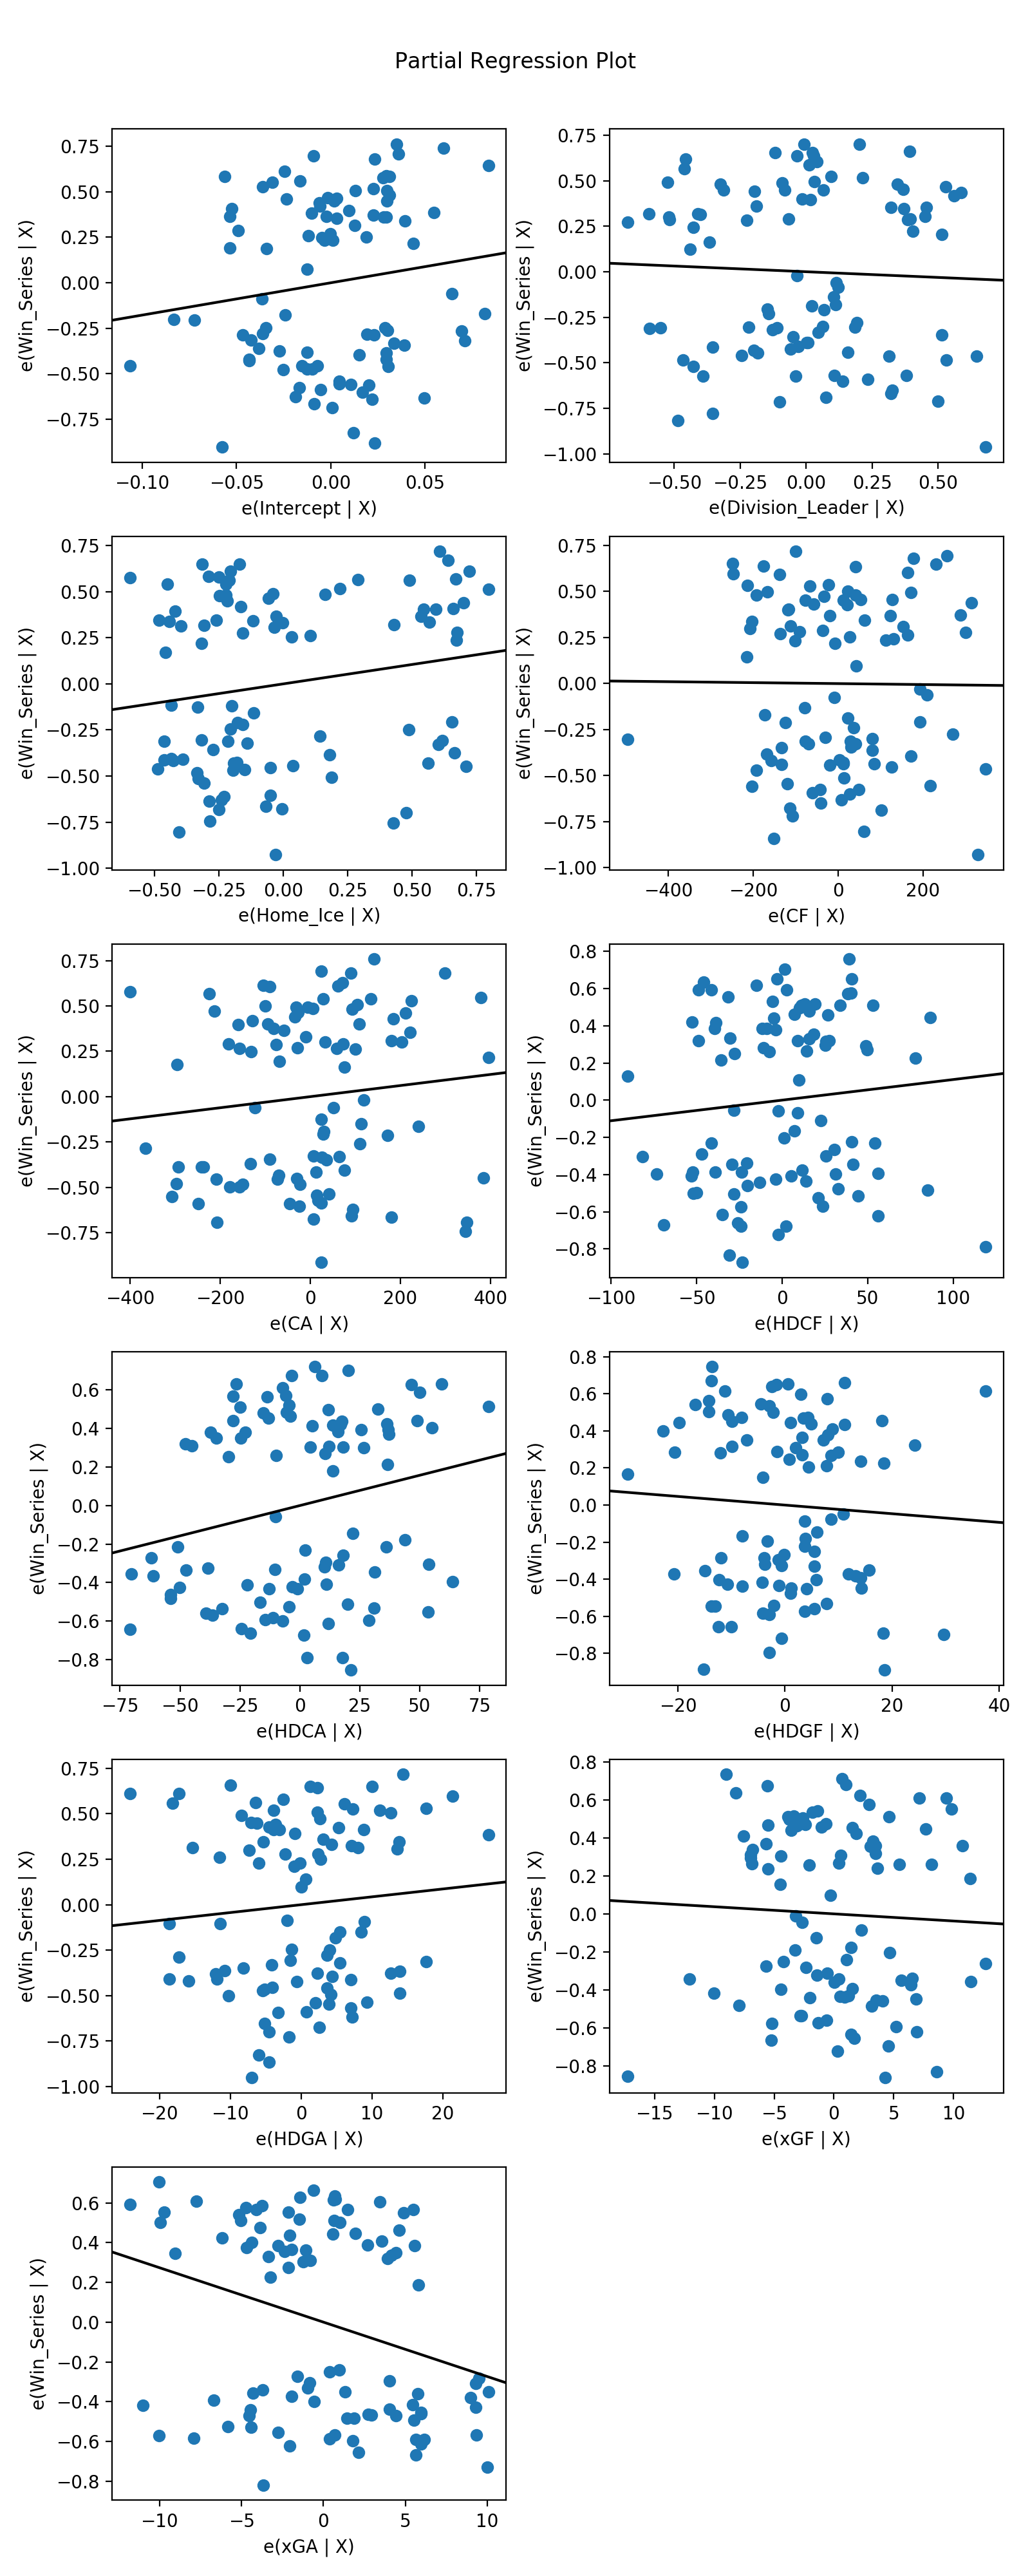

In [14]:
#First Visualization: Partial Regression Plot of the Model
fig1 = plt.figure(figsize=(8,20))
fig1 = sm.graphics.plot_partregress_grid(win_playoff_series_logit_model, 
                                         fig=fig1).savefig('Visualizations/NHL_Playoffs_Partial_Regression_Plot_Smith_Primerano.pdf')

<IPython.core.display.Javascript object>


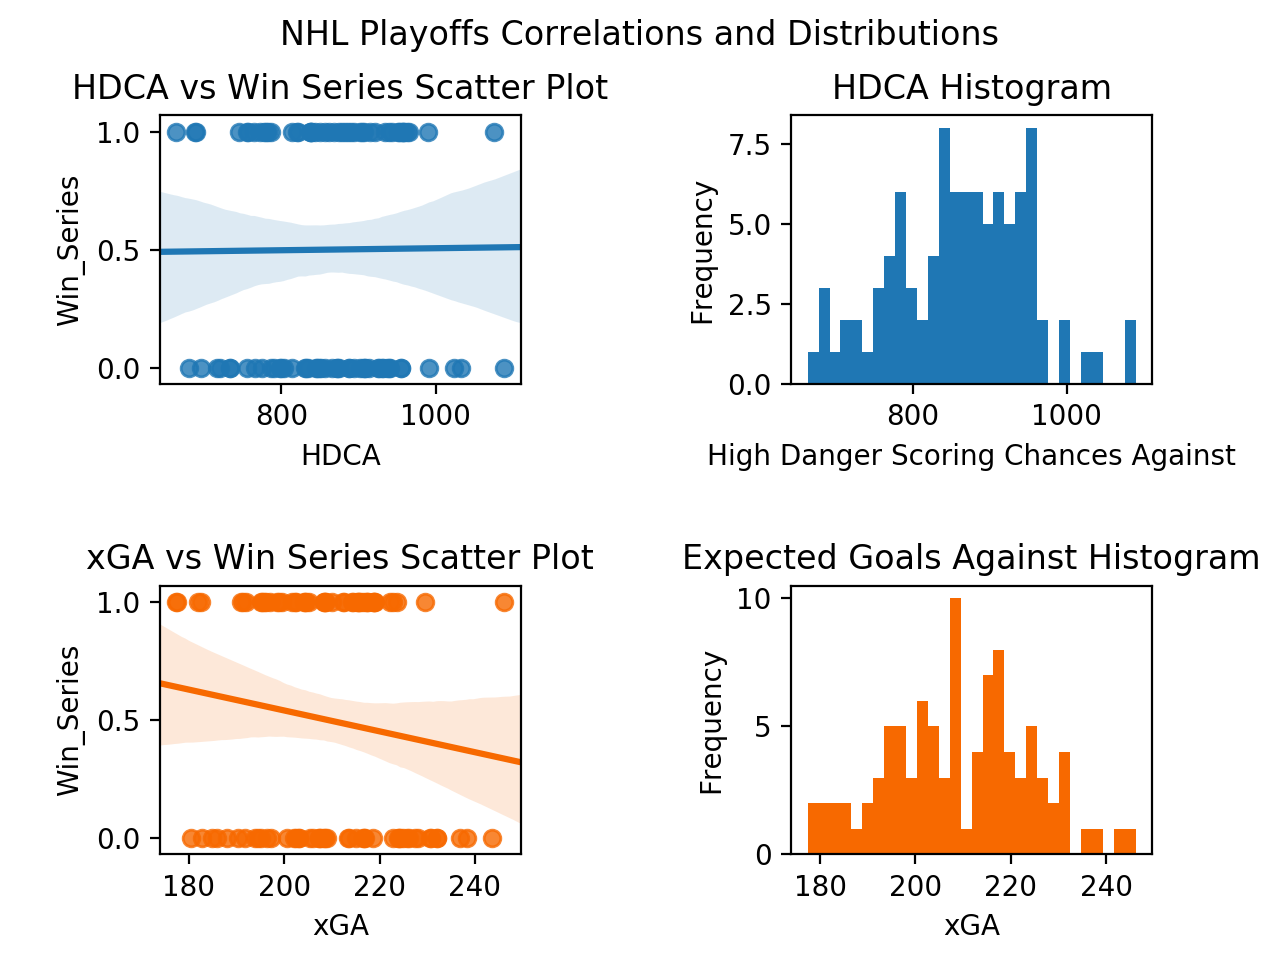

<IPython.core.display.Javascript object>


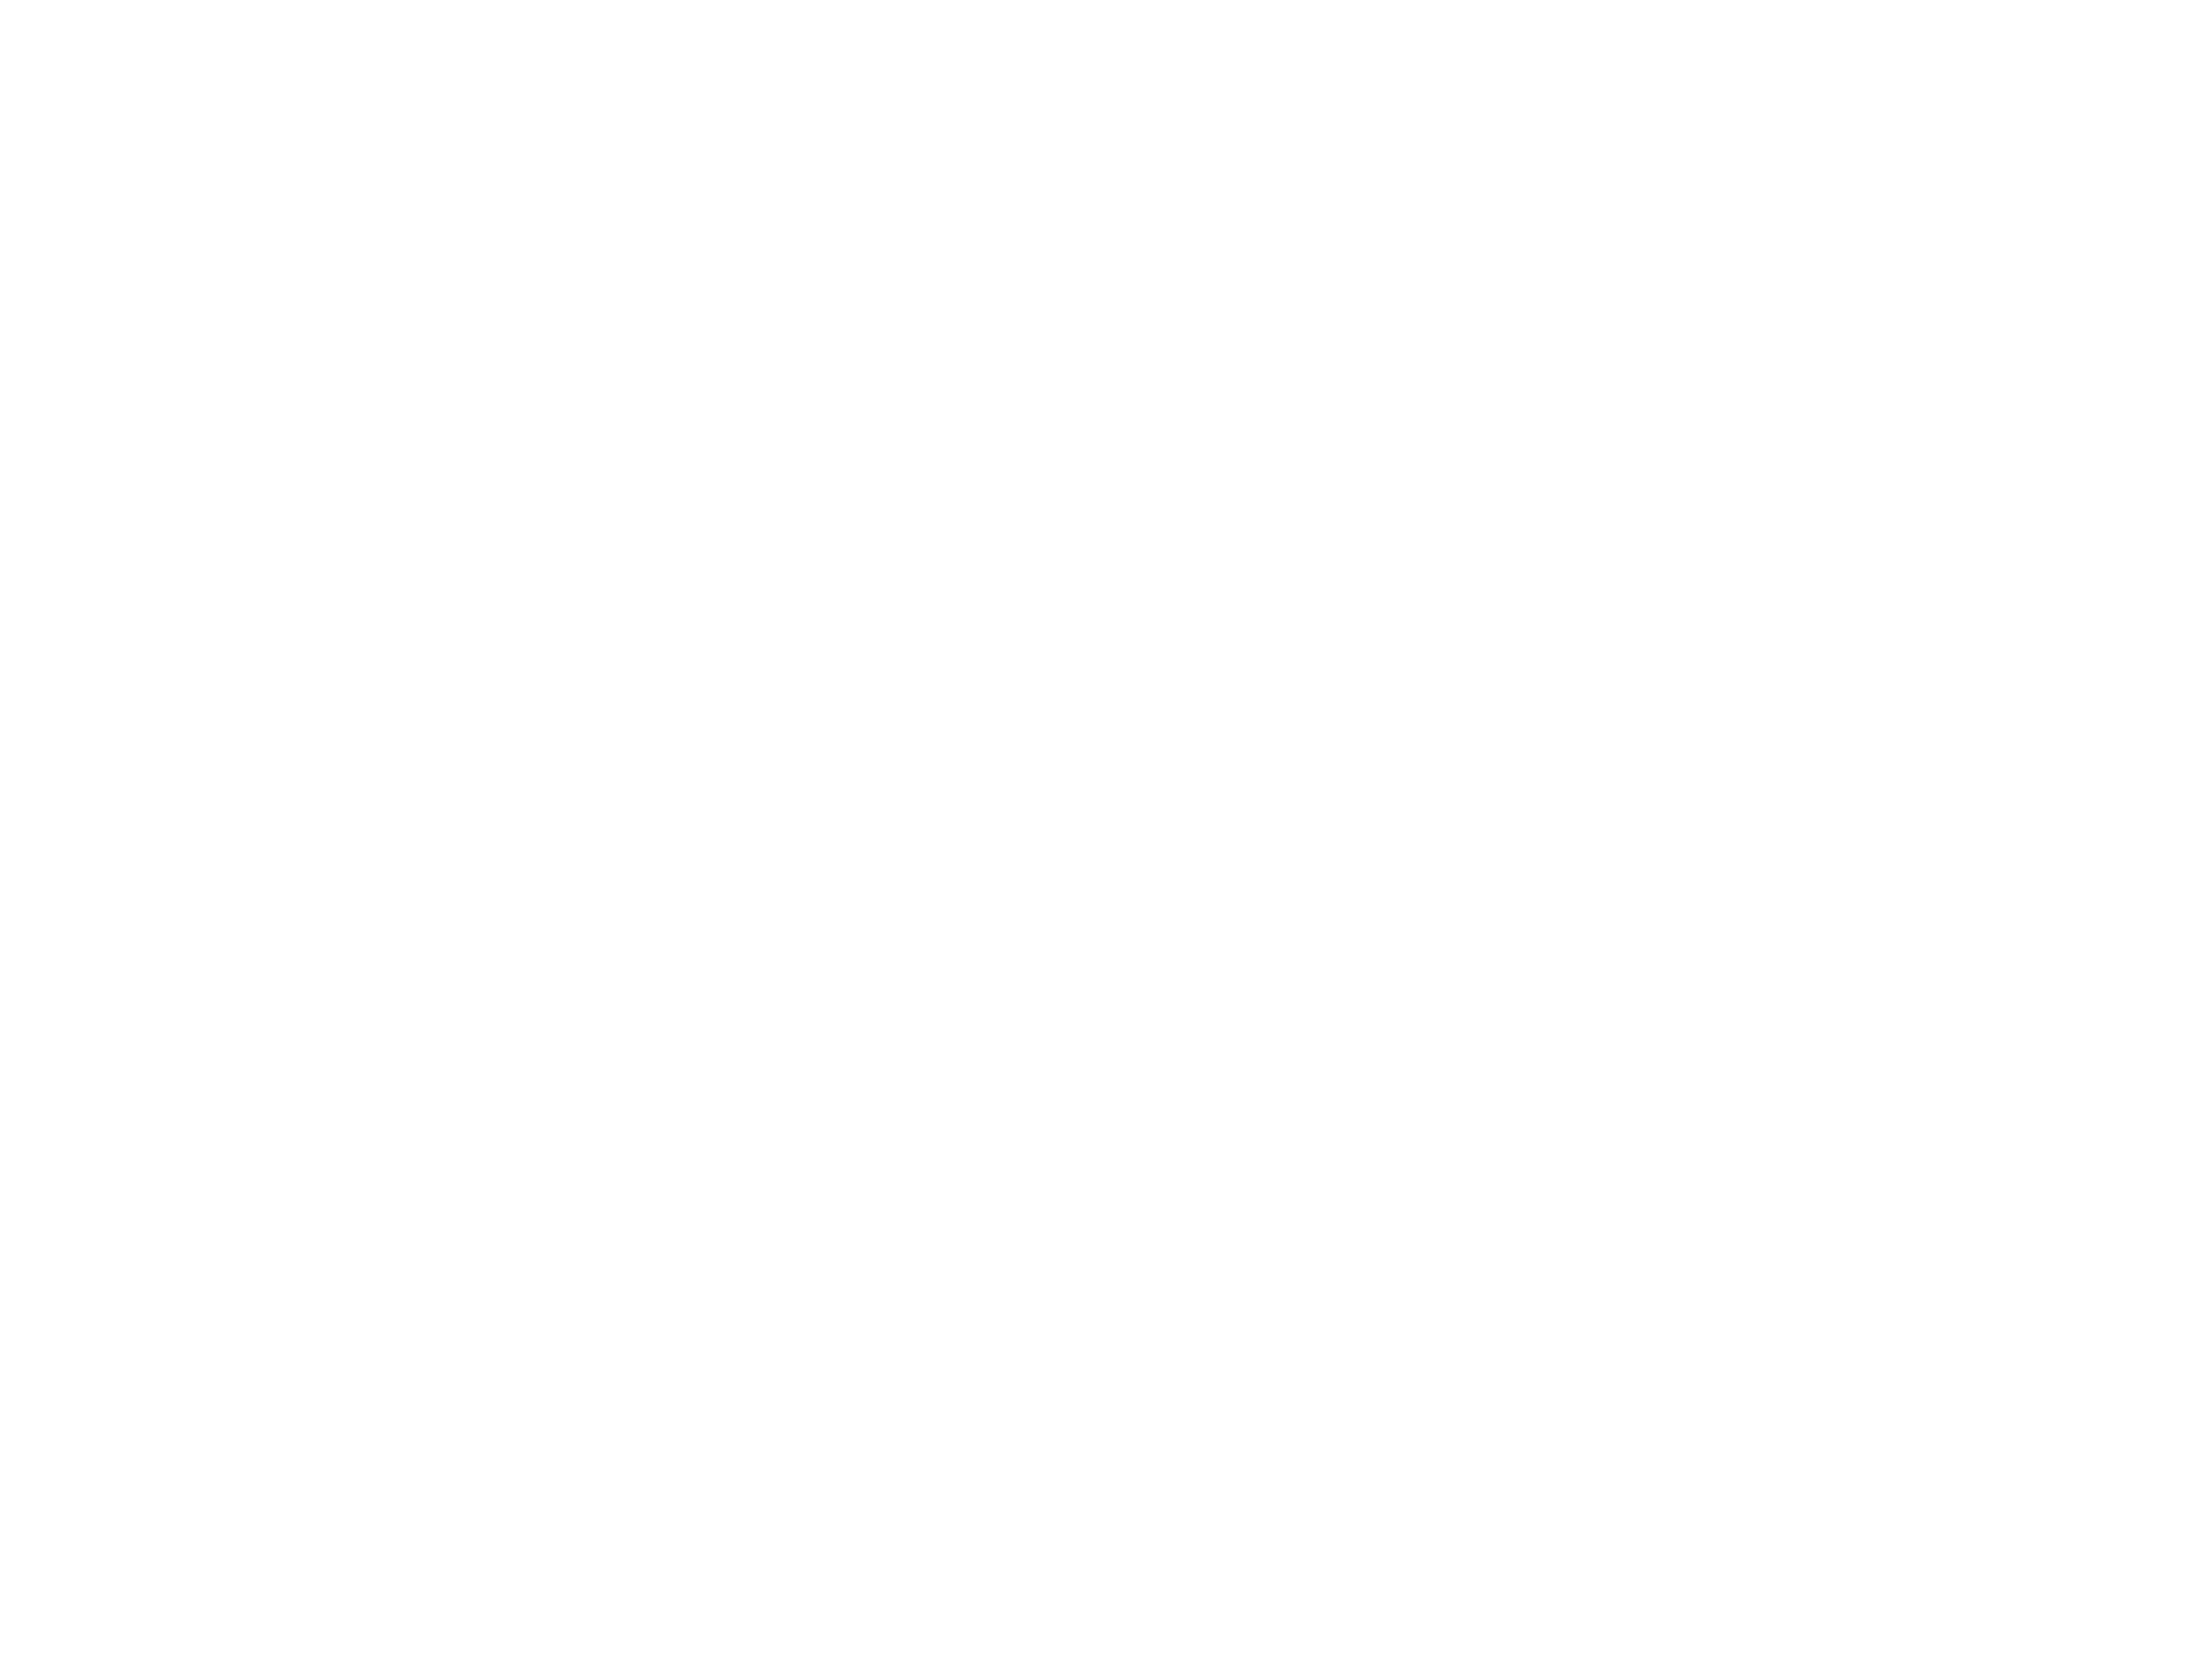

<IPython.core.display.Javascript object>


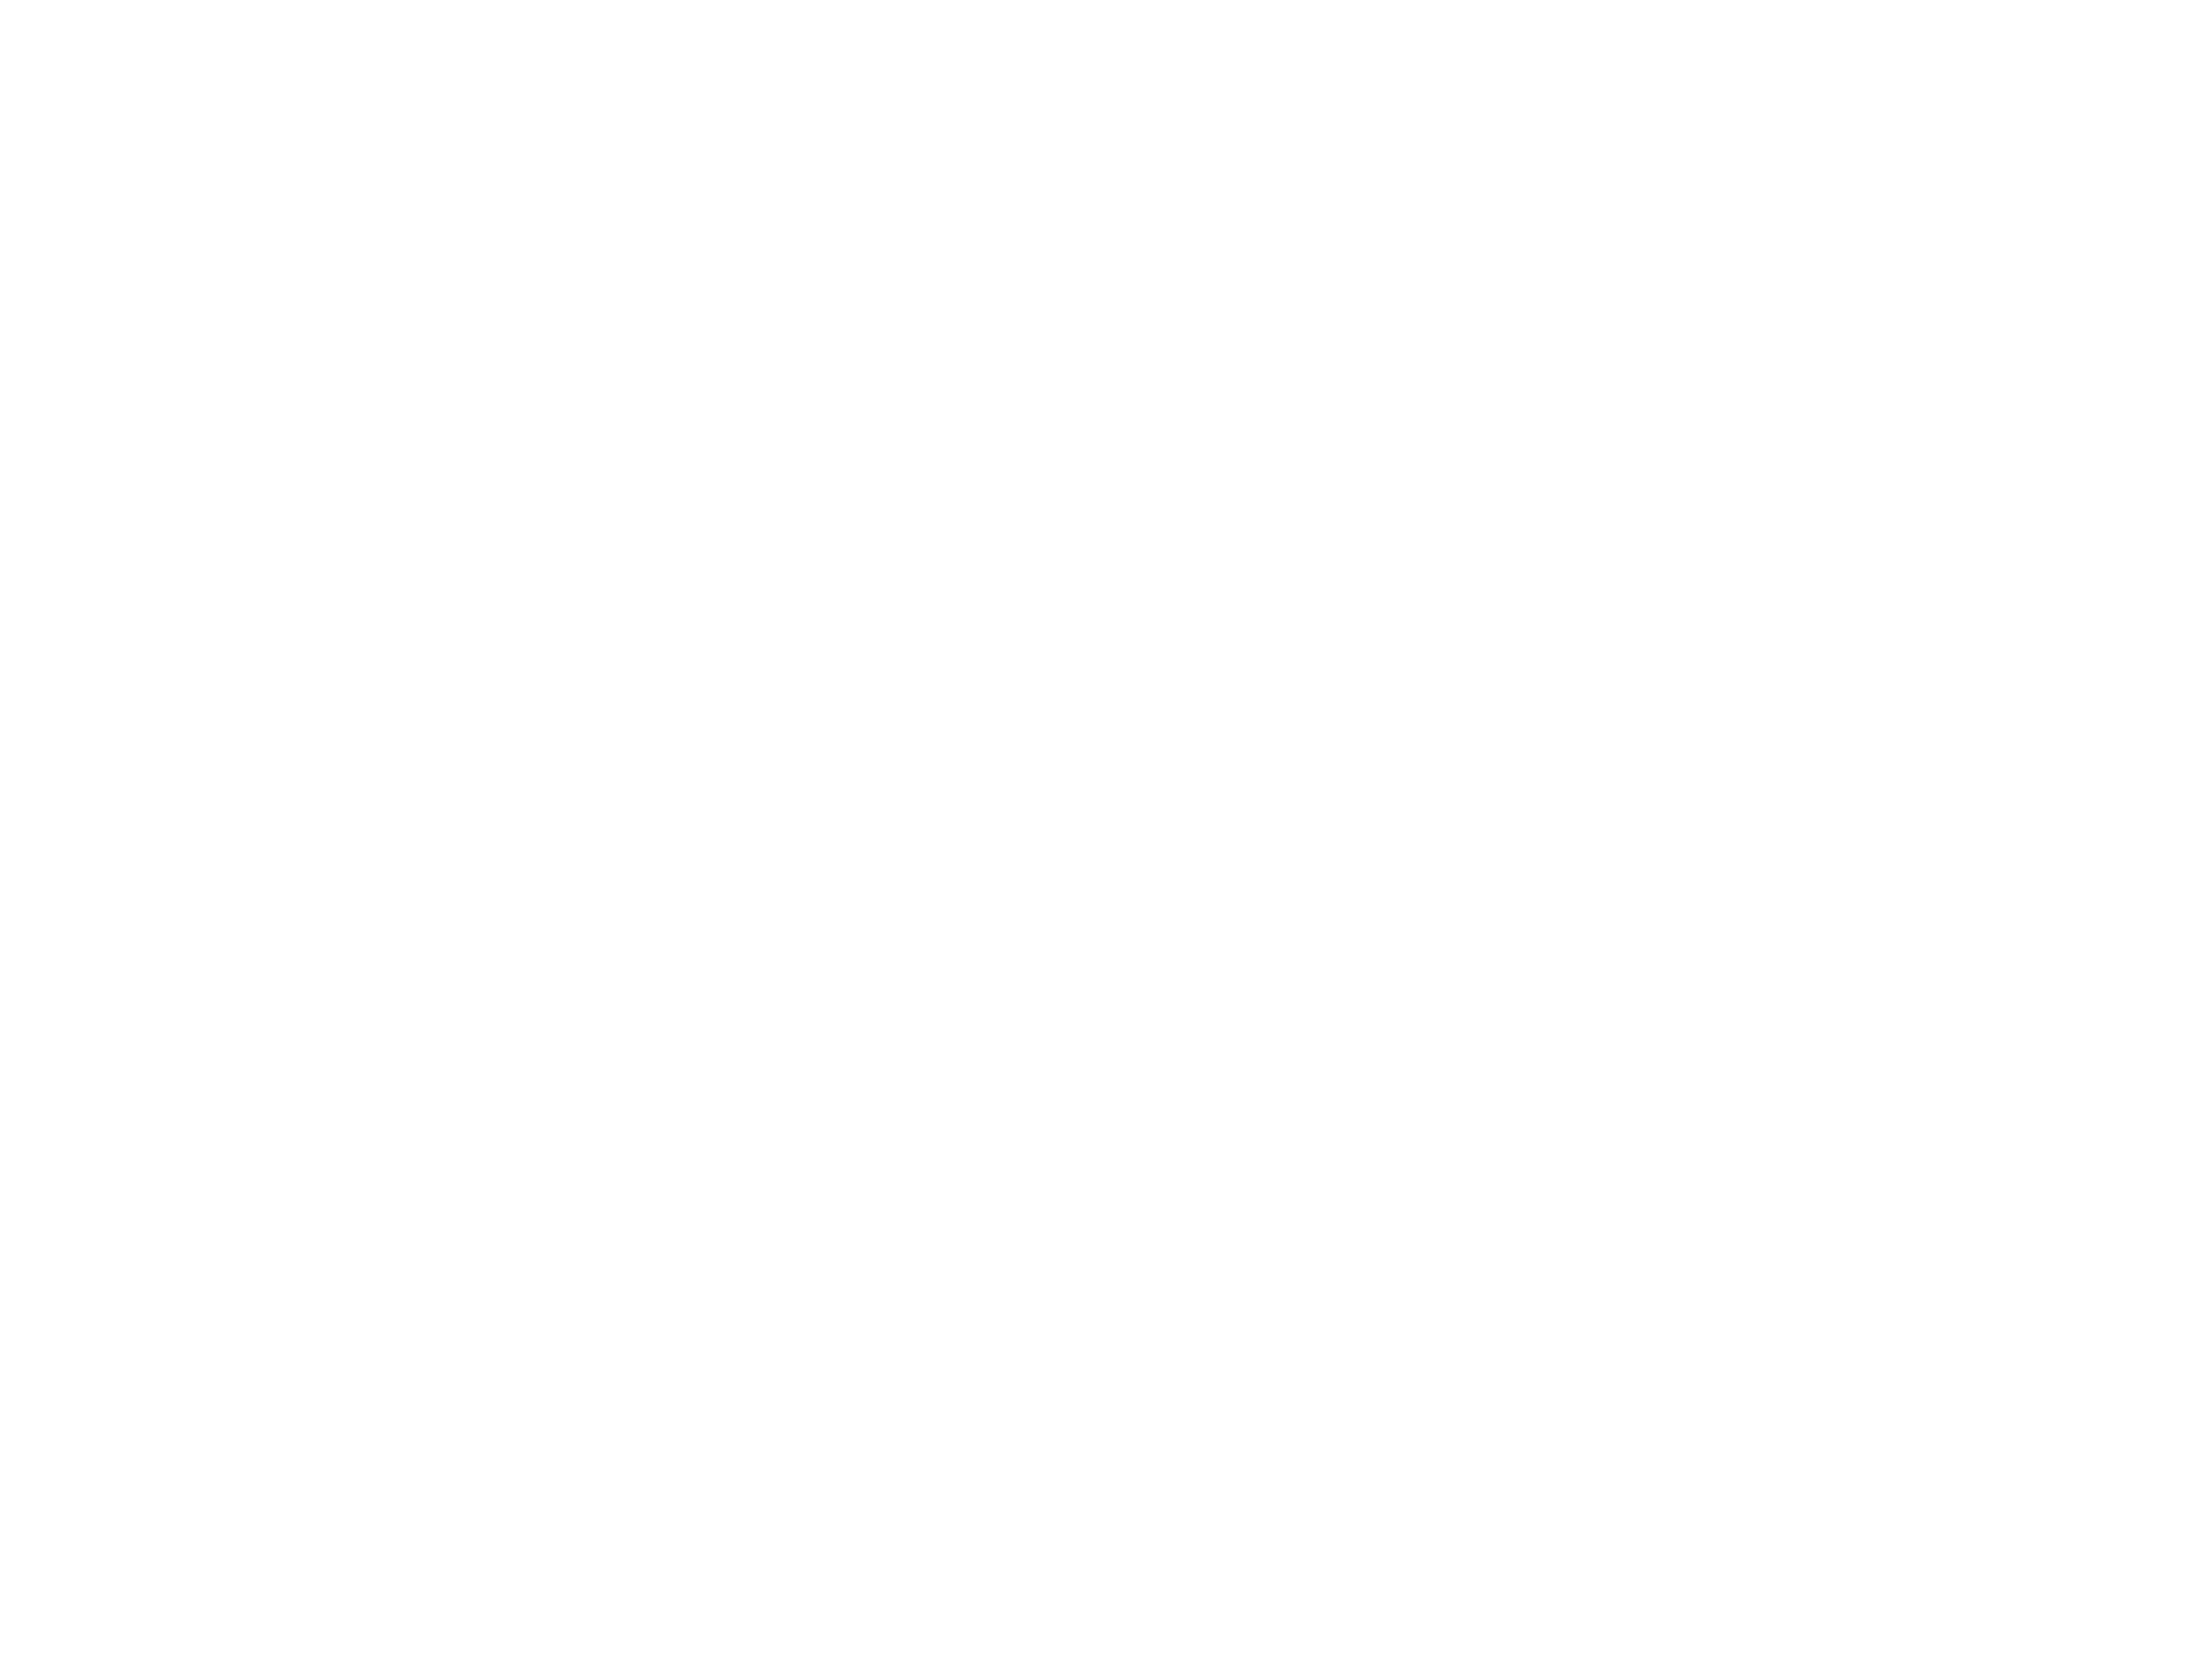

Text(0.5, 0.98, 'NHL Playoffs Correlations and Distributions')

Text(0.5, 1.0, 'HDCA vs Win Series Scatter Plot')

Text(0.5, 1.0, 'HDCA Histogram')

Text(0.5, 0, 'High Danger Scoring Chances Against')

Text(0.5, 1.0, 'xGA vs Win Series Scatter Plot')

Text(0.5, 1.0, 'Expected Goals Against Histogram')

Text(0.5, 0, 'xGA')

In [20]:
#Second Visualization: Scatterplots and Histograms
fig2, axes = plt.subplots(2,2)
plt.figure(figsize=(20,15))

#Add title to new figure
fig2.suptitle('NHL Playoffs Correlations and Distributions')

#High Danger Scoring Chances Against
#Scatter Plot
sns.regplot('HDCA', 'Win_Series', data=nhl_2014_2019, ax=axes[0,0])
axes[0,0].set_title('HDCA vs Win Series Scatter Plot')
#Histogram
nhl_2014_2019[['HDCA']].plot.hist(bins=30, legend=None, ax=axes[0,1])
axes[0,1].set_title('HDCA Histogram')
axes[0,1].set_xlabel('High Danger Scoring Chances Against')

#Expected Goals Against
#Scatter Plot
sns.regplot('xGA', 'Win_Series', data=nhl_2014_2019, color='#f76900', ax=axes[1,0])
axes[1,0].set_title('xGA vs Win Series Scatter Plot')
#Histogram
nhl_2014_2019[['xGA']].plot.hist(bins=30, color='#f76900', legend=None, ax=axes[1,1])
axes[1,1].set_title('Expected Goals Against Histogram')
axes[1,1].set_xlabel('xGA')

#Fix Spacing
fig2.subplots_adjust(wspace = .75, hspace = .75) 
plt.close(9)

#Save Figure
fig2.savefig('Visualizations/NHL_Playoffs_Correlation_Distributions_Smith_Primerano.pdf')

<IPython.core.display.Javascript object>


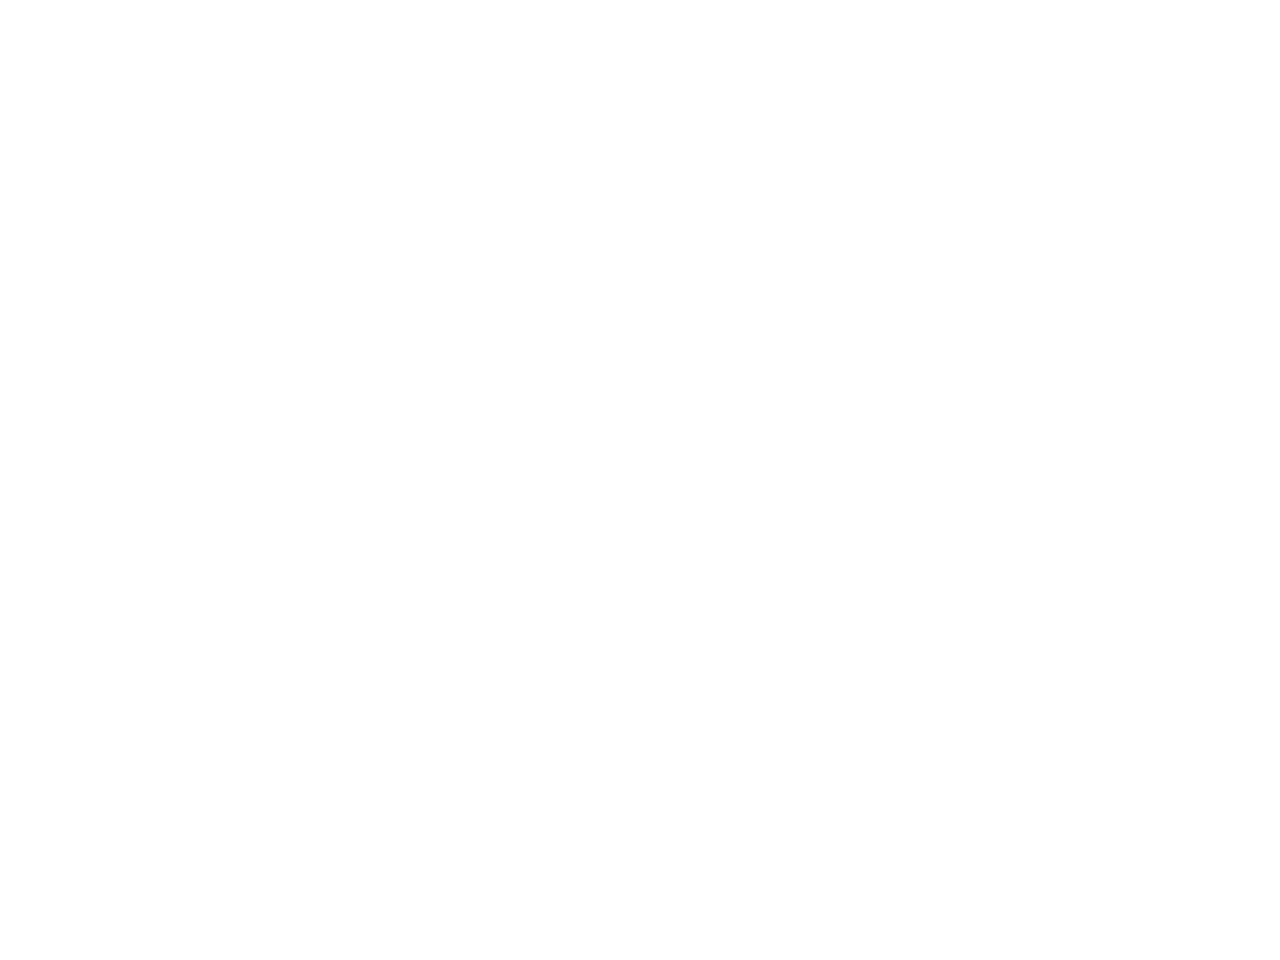

<IPython.core.display.Javascript object>


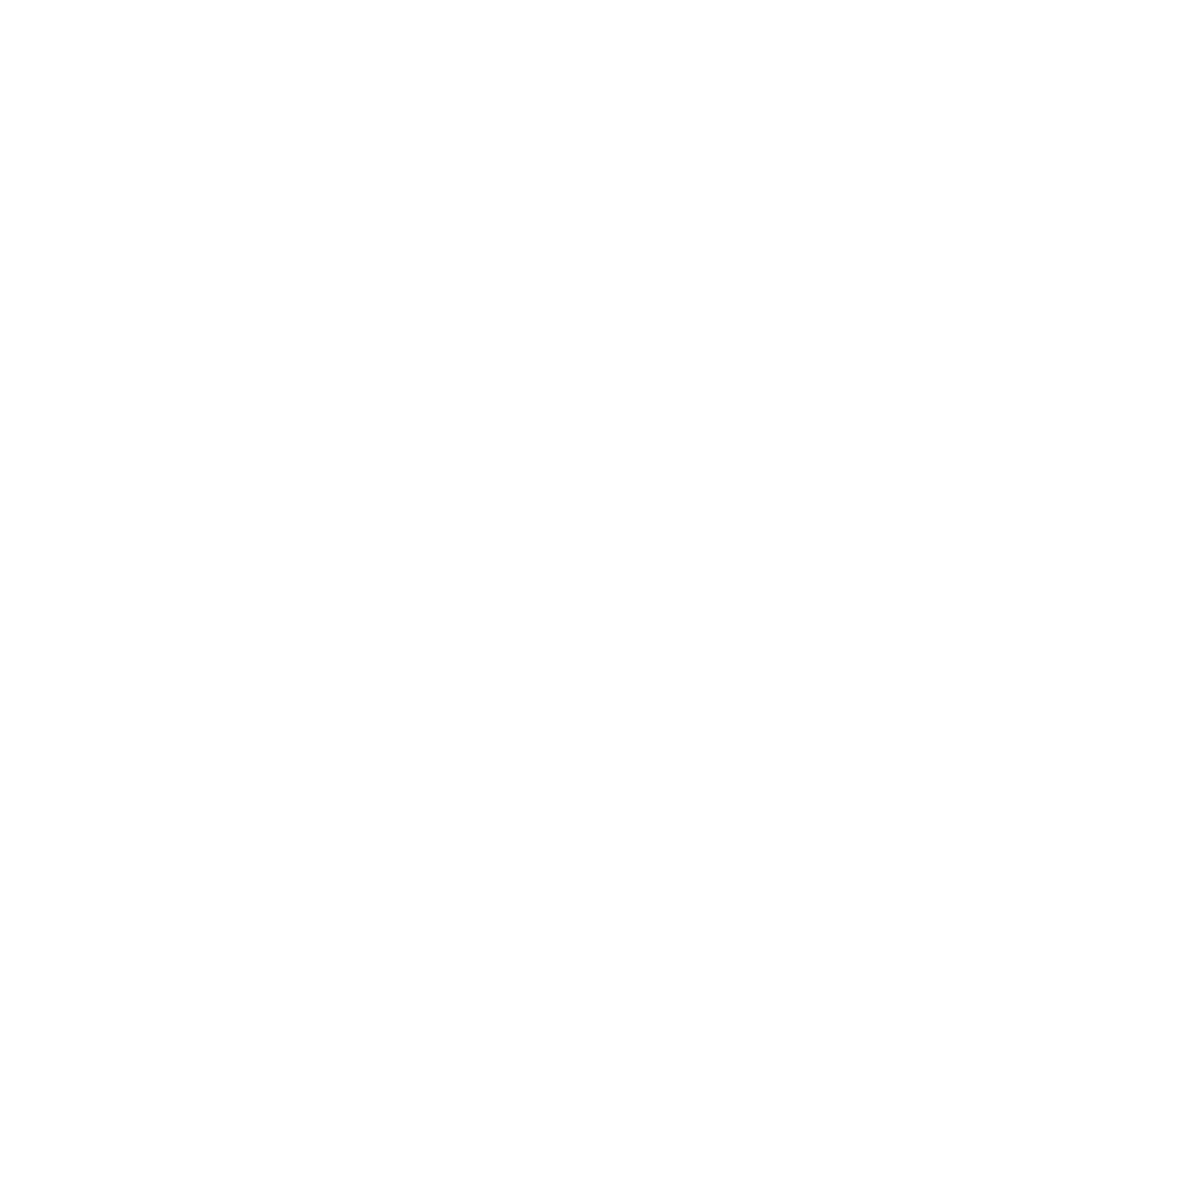

<IPython.core.display.Javascript object>


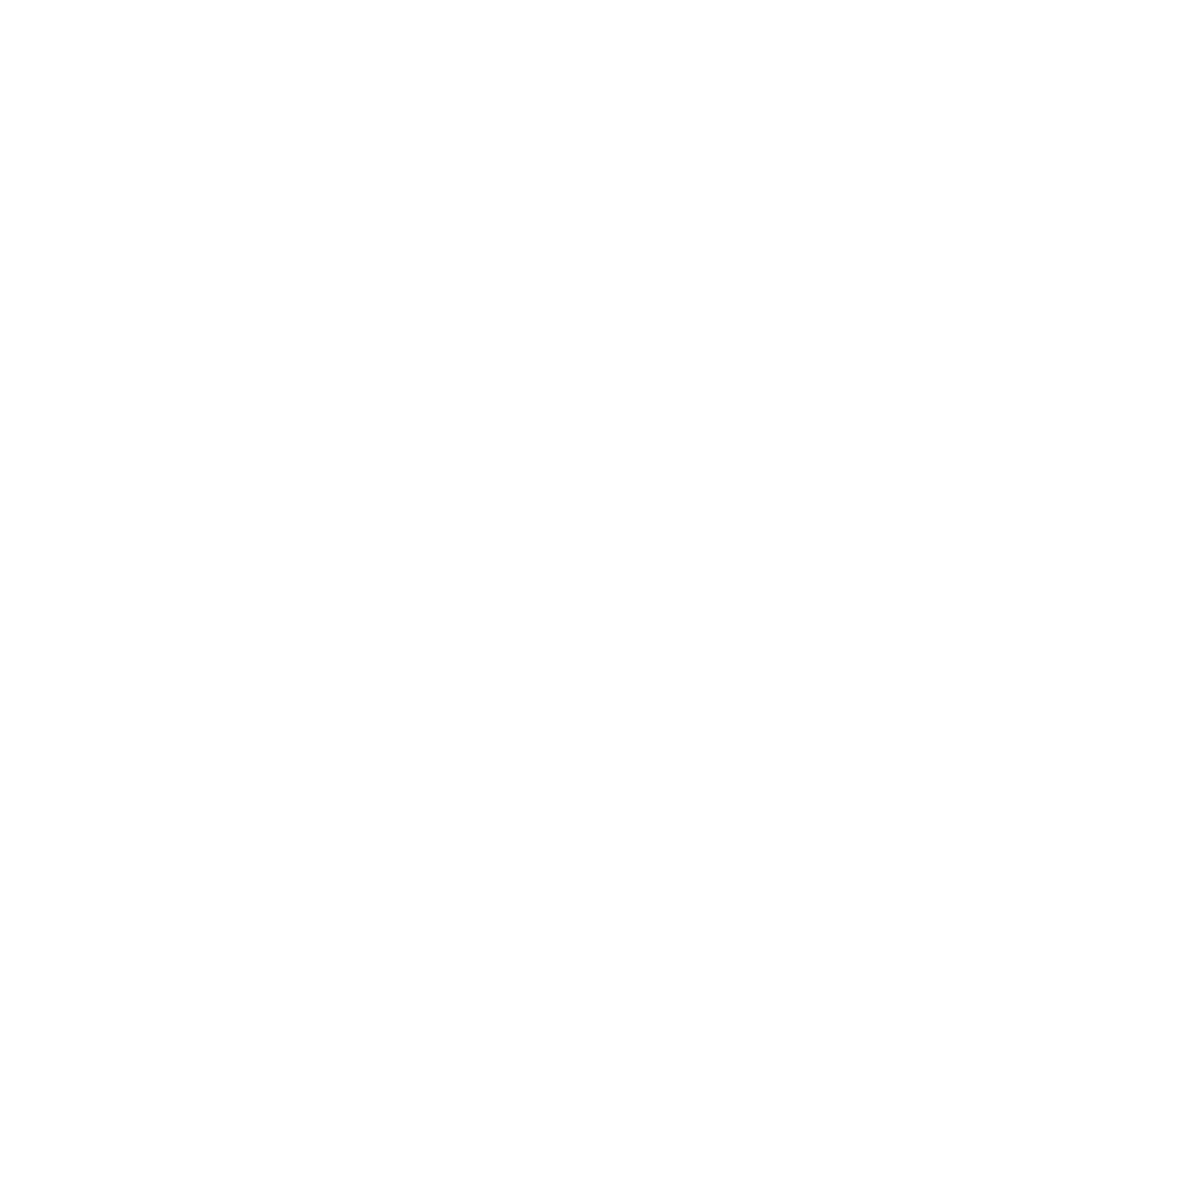

<IPython.core.display.Javascript object>


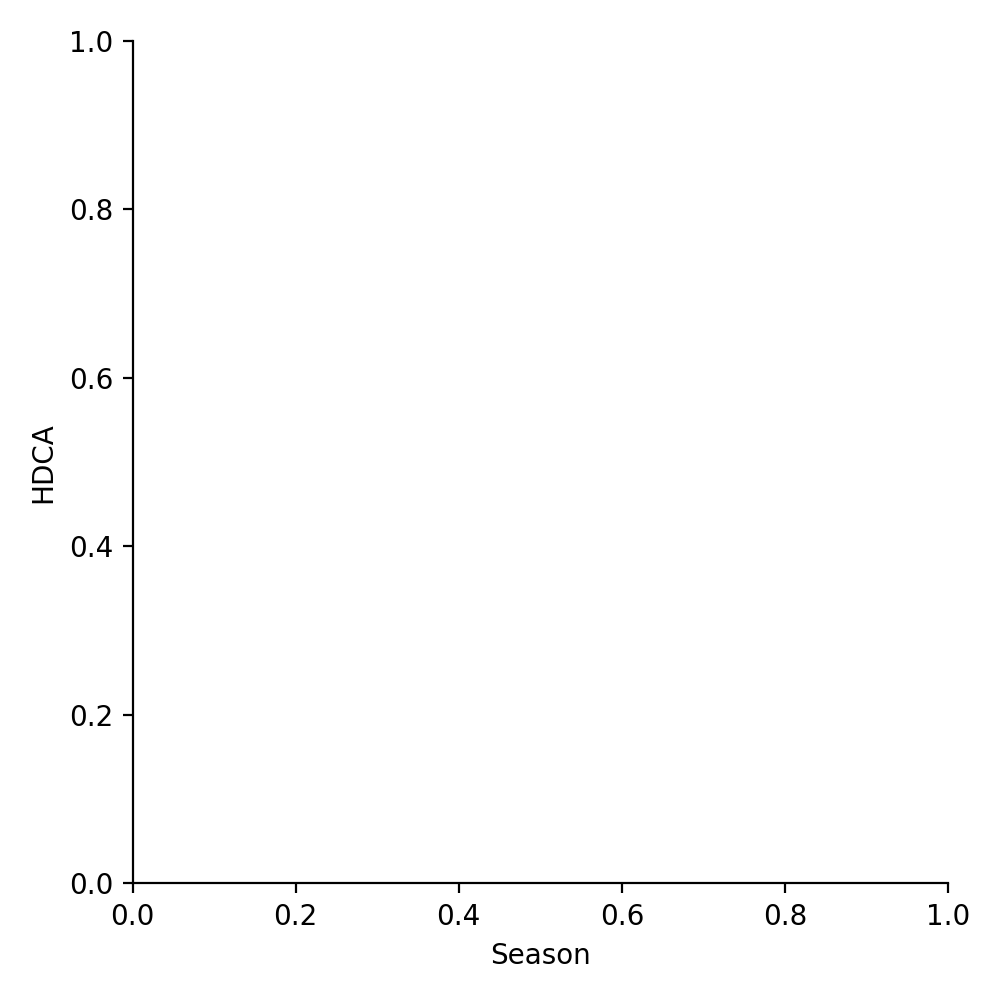

<IPython.core.display.Javascript object>


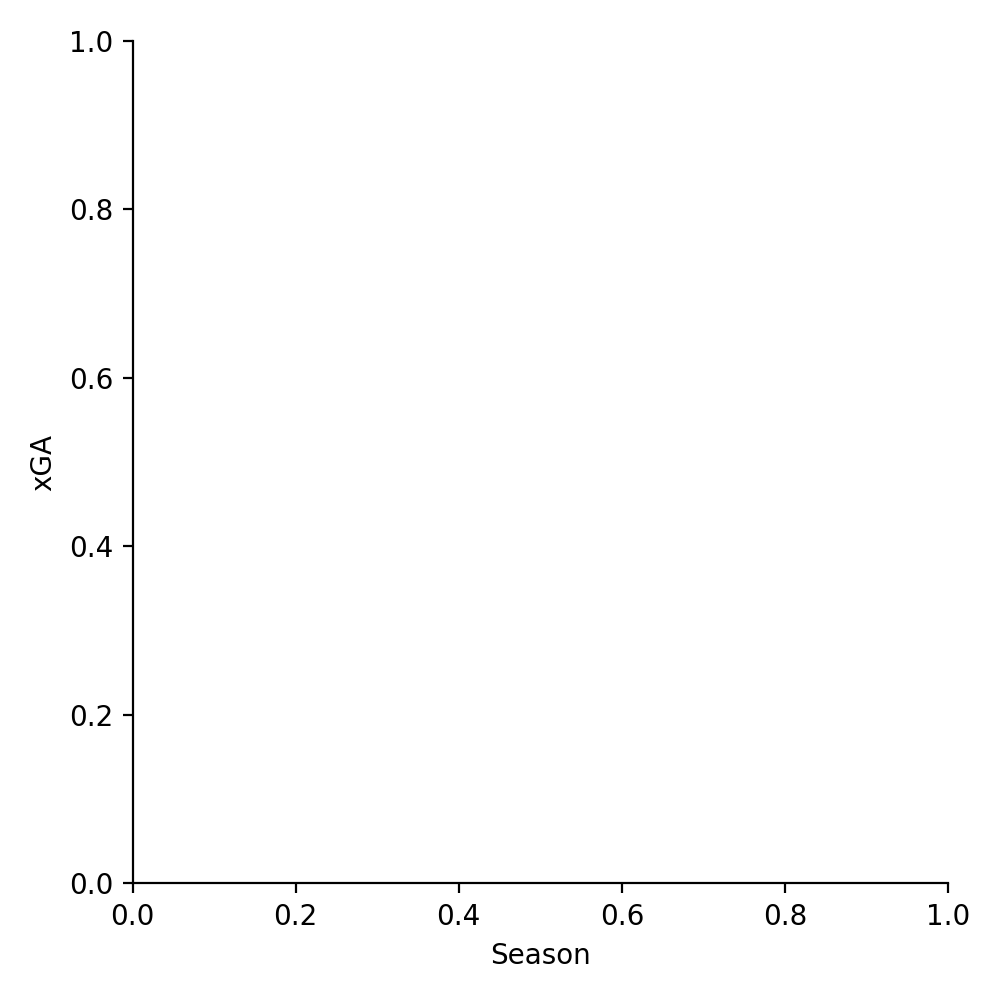

Text(0.5, 0.98, 'Statistically Significant Variables of Successful NHL Playoff Teams')

Text(0.5, 1.0, 'High Danger Scoring Chances Against Box Plots By Season')

Text(0.5, 1.0, 'Expected Goals Against Box Plots By Season')

In [16]:
#Third Visualization: Season by Season Box Plot Distributions of HDCA and xGA
fig3, (ax1, ax2) = plt.subplots(2,1)
plt.figure(figsize=(12,12))

#Plot HDCA in subplot 1
sns.catplot(x='Season',y='HDCA',kind='box', data=nhl_2014_2019, ax=ax1)
sns.stripplot(x='Season',y='HDCA', data=nhl_2014_2019, color='k', ax=ax1)

#Plot xGA in subplot 2
sns.catplot(x='Season', y='xGA',kind='box', data=nhl_2014_2019, ax=ax2)
sns.stripplot(x='Season',y='xGA', data=nhl_2014_2019, color='k', ax=ax2)

#Fig Titles
fig3.suptitle('Statistically Significant Variables of Successful NHL Playoff Teams')
ax1.set_title('High Danger Scoring Chances Against Box Plots By Season')
ax2.set_title('Expected Goals Against Box Plots By Season')

#Space out the Box Plots
fig3.subplots_adjust(wspace = 0, hspace = 0.6) 
plt.close(4)
plt.close(5)

#Save Figure
fig3.savefig('Visualizations/NHL_Playoffs_Boxplots_Smith_Primerano.pdf')